In [124]:
# import required libraries for dataframe and visualization

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [125]:
#loading the dataset
df=pd.read_csv('/content/OnlineRetail (3).csv', sep=",", encoding="ISO-8859-1", header=0)

In [126]:
#No.of rows and columns
df.shape

(541909, 8)

In [127]:
 #viewing some statistical details of dataset
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


By using the df.describe() function we came to know that our minimum quantity is in negative and we all know that a quantity will never be in Negative. So, we have to remove this redundancy in order to get better accuracy because redundancy can cause miss grouping of data.

DATA PREPROCESSING

In [128]:
#removing the redundancy

df=df.loc[df["Quantity"] >0]

In [129]:
df.shape

(531285, 8)

In [130]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,531285.000000,531285.000000,397924.000000
mean,10.655262,3.857296,15294.315171
std,156.830323,41.810047,1713.169877
min,1.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13969.000000
50%,3.000000,2.080000,15159.000000
75%,10.000000,4.130000,16795.000000
max,80995.000000,13541.330000,18287.000000


In [131]:
df.head() #viewing first 5 rows of dataset

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [132]:
#missing values
df.isna().sum()

,0
InvoiceNo,0
StockCode,0
Description,592
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,133361
Country,0


In [133]:
# Calculating  % of null values contribution in dataset

df_null = round(100*(df.isna().sum())/len(df), 2)
df_null

,0
InvoiceNo,0.00
StockCode,0.00
Description,0.11
Quantity,0.00
InvoiceDate,0.00
UnitPrice,0.00
CustomerID,25.10
Country,0.00


In [134]:
#Here, we will drop null values as it is less than 30%
df.dropna(inplace=True)

In [135]:
#dropping duplicates
df.duplicated().sum()

5192

In [136]:
df.drop_duplicates(inplace=True)

In [137]:
#shape of the dataset after dropping null values & duplicates.
df.shape

(392732, 8)

In [138]:
df.info() #getting all the information and datatype about the dataset

<class 'pandas.core.frame.DataFrame'>
Index: 392732 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    392732 non-null  object 
 1   StockCode    392732 non-null  object 
 2   Description  392732 non-null  object 
 3   Quantity     392732 non-null  int64  
 4   InvoiceDate  392732 non-null  object 
 5   UnitPrice    392732 non-null  float64
 6   CustomerID   392732 non-null  float64
 7   Country      392732 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.0+ MB


Now here we can see that Invoice date is object type now we have to convert this into datetime for calculating all the values.

In [139]:
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"]) #converting into datetime

In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392732 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392732 non-null  object        
 1   StockCode    392732 non-null  object        
 2   Description  392732 non-null  object        
 3   Quantity     392732 non-null  int64         
 4   InvoiceDate  392732 non-null  datetime64[ns]
 5   UnitPrice    392732 non-null  float64       
 6   CustomerID   392732 non-null  float64       
 7   Country      392732 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.0+ MB


Now we can see that our InvoiceDate is converted.

In [141]:
# Exploratory Analysis

# Top 10 countries by number of transactions
top_countries = df['Country'].value_counts().head(10)
top_countries

,count
Country,
United Kingdom,349227
Germany,9027
France,8327
EIRE,7228
Spain,2480
Netherlands,2363
Belgium,2031
Switzerland,1842
Portugal,1453


In [142]:
# Total revenue per country
df['Revenue'] = (df['Quantity'] * df['UnitPrice'])

revenue_per_country = df.groupby('Country')['Revenue'].sum().sort_values(ascending=False).head(10)
revenue_per_country

,Revenue
Country,
United Kingdom,7285024.644
Netherlands,285446.340
EIRE,265262.460
Germany,228678.400
France,208934.310
Australia,138453.810
Spain,61558.560
Switzerland,56443.950
Belgium,41196.340


In [143]:
# Most purchased products
most_purchased_products = (df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10))
most_purchased_products

,Quantity
Description,
"PAPER CRAFT , LITTLE BIRDIE",80995
MEDIUM CERAMIC TOP STORAGE JAR,77916
WORLD WAR 2 GLIDERS ASSTD DESIGNS,54319
JUMBO BAG RED RETROSPOT,46078
WHITE HANGING HEART T-LIGHT HOLDER,36706
ASSORTED COLOUR BIRD ORNAMENT,35263
PACK OF 72 RETROSPOT CAKE CASES,33670
POPCORN HOLDER,30919
RABBIT NIGHT LIGHT,27153


In [144]:
#Observe the countries that have most of the customers residing

df.Country.value_counts(normalize=True).head(10).mul(100).round(2).astype(str) + ' %'

,proportion
Country,
United Kingdom,88.92 %
Germany,2.3 %
France,2.12 %
EIRE,1.84 %
Spain,0.63 %
Netherlands,0.6 %
Belgium,0.52 %
Switzerland,0.47 %
Portugal,0.37 %


# Key Insights from Exploratory Analysis:

# Top 10 Countries by Transactions:

The majority of transactions are from the United Kingdom (349227), followed by Germany (9,027) and France (8,327).

# Top Revenue-Generating Countries:

The United Kingdom leads with total revenue of approximately £7.28M, followed by the Netherlands (£285K) and EIRE (£265K).

# Most Purchased Products:

The top products by quantity sold include:

PAPER CRAFT , LITTLE BIRDIE (80,995units)

MEDIUM CERAMIC TOP STORAGE JAR (77,916 units)

WORLD WAR 2 GLIDERS ASSTD DESIGNS	 (54,319 units)

# Most No. of Customers:

UK has majority of the customers approximately 89%, followed by Germany and France.

## **Now, Performing customer segmentation using RFM analysis (Recency, Frequency, and Monetary value).**

We are going to analysis the Customers based on below 3 factors:

R (Recency): Number of days since last purchase

F (Frequency): Number of tracsactions

M (Monetary): Total amount of transactions (revenue contributed)

Now we will calculate monetary of our dataset

In [145]:
#calculating our monetary value

df["Sale"] =df.Quantity * df.UnitPrice
#created a column of sale

In [146]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,Sale
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,20.34


In [147]:
monetary =df.groupby("CustomerID").Sale.sum()
"""
Here we are getting our monetary value by grouping customer with their customer id and total no. of sales.
"""

monetary = monetary.reset_index()
#resetting our index,our monetary has multiindex so we are removing it

In [148]:
monetary.head()

,CustomerID,Sale
0,12346.0,77183.60
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


Now we will calculate frequency of our dataset

In [149]:
#calculating our frequency

frequency=df.groupby("CustomerID").InvoiceNo.count()

"""
for calculating frequency here we also using groupby function grouping CustomerId along with the count of Their invoice no. we can get our frequency
"""

frequency = frequency.reset_index()
#resetting our index,our frequency has multiindex so we are removing it

In [150]:
frequency.head()

,CustomerID,InvoiceNo
0,12346.0,1
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


Now we will calculate our recency value

In [151]:
#calculating our recency value

LastDate=max(df.InvoiceDate) #calculating the last date of InvoiceDate

In [152]:
LastDate

Timestamp('2011-12-09 12:50:00')

In [153]:
LastDate = LastDate + pd.DateOffset(days=1)
#adding one to LastDate

In [154]:
LastDate

Timestamp('2011-12-10 12:50:00')

In [155]:
df["Diff"] = LastDate - df.InvoiceDate

#Diff is the difference between our Lastate and InvoiceData

In [156]:
recency = df.groupby("CustomerID").Diff.min()
"""
here we get our recency value using group by
"""
recency = recency.reset_index()

In [157]:
recency.head()

,CustomerID,Diff
0,12346.0,326 days 02:49:00
1,12347.0,2 days 20:58:00
2,12348.0,75 days 23:37:00
3,12349.0,19 days 02:59:00
4,12350.0,310 days 20:49:00


# Now we create a combined data frame

In [158]:
#combining all dataframes into one

rmf = monetary.merge(frequency, on = "CustomerID")

In [159]:
rmf = rmf.merge(recency, on = "CustomerID")

In [160]:
rmf.columns = ["CustomerID", "Monetary", "Frequency", "Recency"]

In [161]:
rmf.head()

,CustomerID,Monetary,Frequency,Recency
0,12346.0,77183.60,1,326 days 02:49:00
1,12347.0,4310.00,182,2 days 20:58:00
2,12348.0,1797.24,31,75 days 23:37:00
3,12349.0,1757.55,73,19 days 02:59:00
4,12350.0,334.40,17,310 days 20:49:00


In [162]:
#rmf = RMF.drop("CustomerID",axis =1)

#dropping customer id

rmf.Recency = rmf.Recency.dt.days

In [163]:
rmf

,CustomerID,Monetary,Frequency,Recency
0,12346.0,77183.60,1,326
1,12347.0,4310.00,182,2
2,12348.0,1797.24,31,75
3,12349.0,1757.55,73,19
4,12350.0,334.40,17,310
...,...,...,...,...
4334,18280.0,180.60,10,278
4335,18281.0,80.82,7,181
4336,18282.0,178.05,12,8
4337,18283.0,2045.53,721,4


### **Handling Outliers--** It is usually meant that in unsupervised learning, removal of outliers is not much necessary because outliers will be in another cluster but for the purpose of cleaning the data , here it is done.

There are 2 types of outliers and we will treat outliers as it can skew our dataset-

Statistical

Domain specific

Text(0.5, 0, 'Attributes')

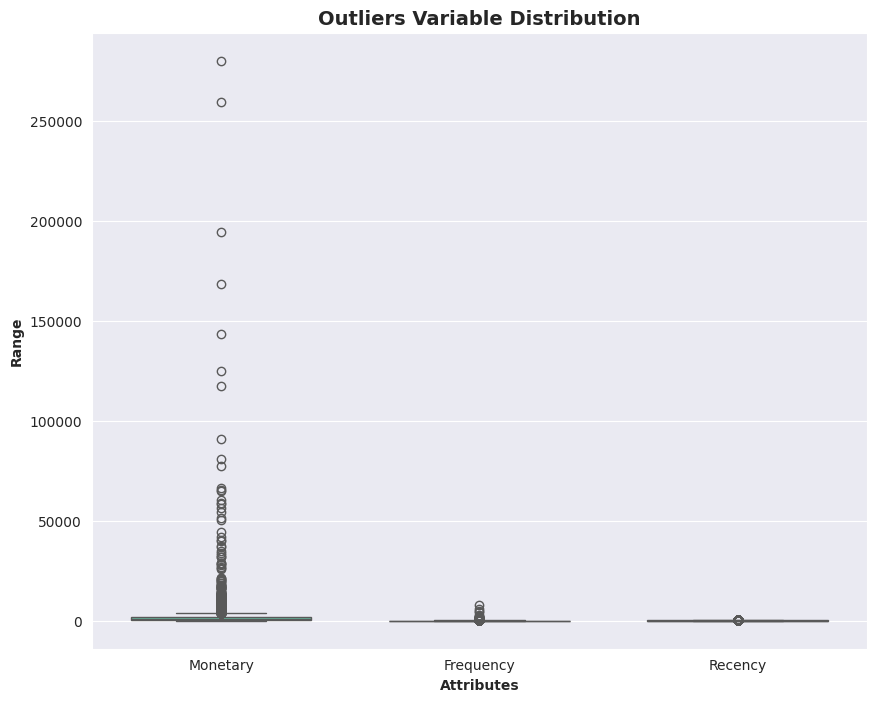

In [164]:
# Outlier Analysis of Monetary Frequency and Recency

attributes = ['Monetary','Frequency','Recency']
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(data = rmf[attributes], orient="v", palette="Set2" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attributes", fontweight = 'bold')

In [165]:
# Removing (statistical) outliers for Monetary
Q1 = rmf.Monetary.quantile(0.05)
Q3 = rmf.Monetary.quantile(0.95)
IQR = Q3 - Q1
rmf = rmf[(rmf.Monetary >= Q1 - 1.5*IQR) & (rmf.Monetary <= Q3 + 1.5*IQR)]

# Removing (statistical) outliers for Recency
Q1 = rmf.Recency.quantile(0.05)
Q3 = rmf.Recency.quantile(0.95)
IQR = Q3 - Q1
rmf = rmf[(rmf.Recency >= Q1 - 1.5*IQR) & (rmf.Recency <= Q3 + 1.5*IQR)]

# Removing (statistical) outliers for Frequency
Q1 = rmf.Frequency.quantile(0.05)
Q3 = rmf.Frequency.quantile(0.95)
IQR = Q3 - Q1
rmf = rmf[(rmf.Frequency >= Q1 - 1.5*IQR) & (rmf.Frequency <= Q3 + 1.5*IQR)]

## Calculating RFM Metrics

In [166]:
#Recency score based on quantiles
#Assigning labels from 1-5,  1 being the lowest recency
rmf["Recency_score"] = pd.qcut(rmf['Recency'], 5, labels = [5, 4, 3, 2, 1])

#Frequency score
rmf["Frequency_score"] = pd.qcut(rmf['Frequency'].rank(method = "first"), 5, labels = [1, 2, 3, 4, 5])

In [167]:
#Combine Recency and Frequency scores to create RFM Segment
rmf["rmf_segment"] = rmf['Recency_score'].astype(str) + rmf['Frequency_score'].astype(str)

In [168]:
rmf

,CustomerID,Monetary,Frequency,Recency,Recency_score,Frequency_score,rmf_segment
1,12347.0,4310.00,182,2,5,5,55
2,12348.0,1797.24,31,75,2,3,23
3,12349.0,1757.55,73,19,4,4,44
4,12350.0,334.40,17,310,1,2,12
5,12352.0,2506.04,85,36,3,4,34
...,...,...,...,...,...,...,...
4334,18280.0,180.60,10,278,1,1,11
4335,18281.0,80.82,7,181,2,1,21
4336,18282.0,178.05,12,8,5,1,51
4337,18283.0,2045.53,721,4,5,5,55


## DATA VISUALIZATION

In [169]:
#Eliminating Future warning
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

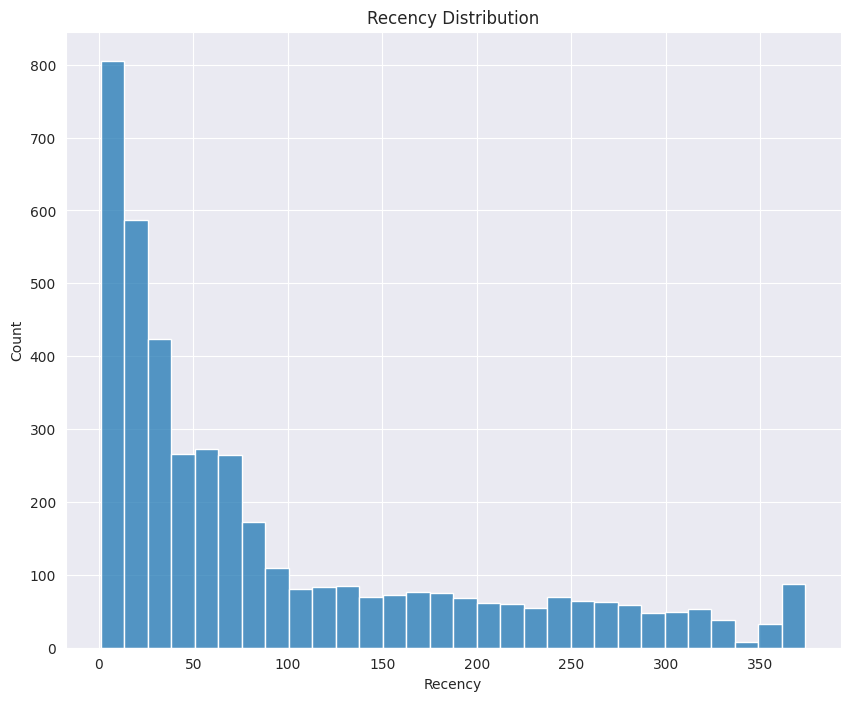

In [170]:
# recency Distribution
sns.histplot(data = rmf, x = 'Recency', bins = 30)
plt.title('Recency Distribution')
plt.show()

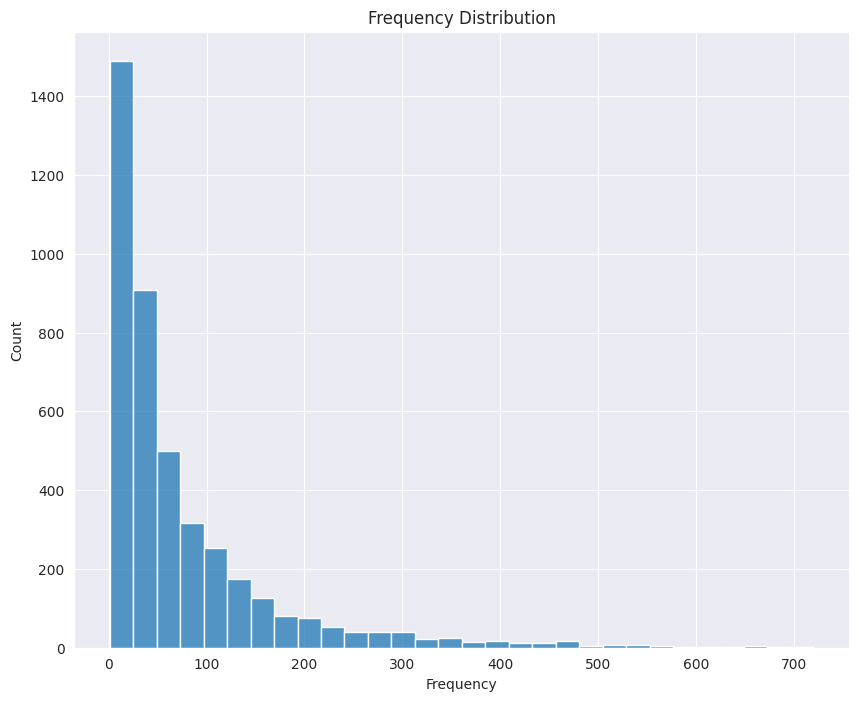

In [171]:
# Frequency Distribution
sns.histplot(data = rmf, x = 'Frequency', bins = 30)
plt.title('Frequency Distribution')
plt.show()

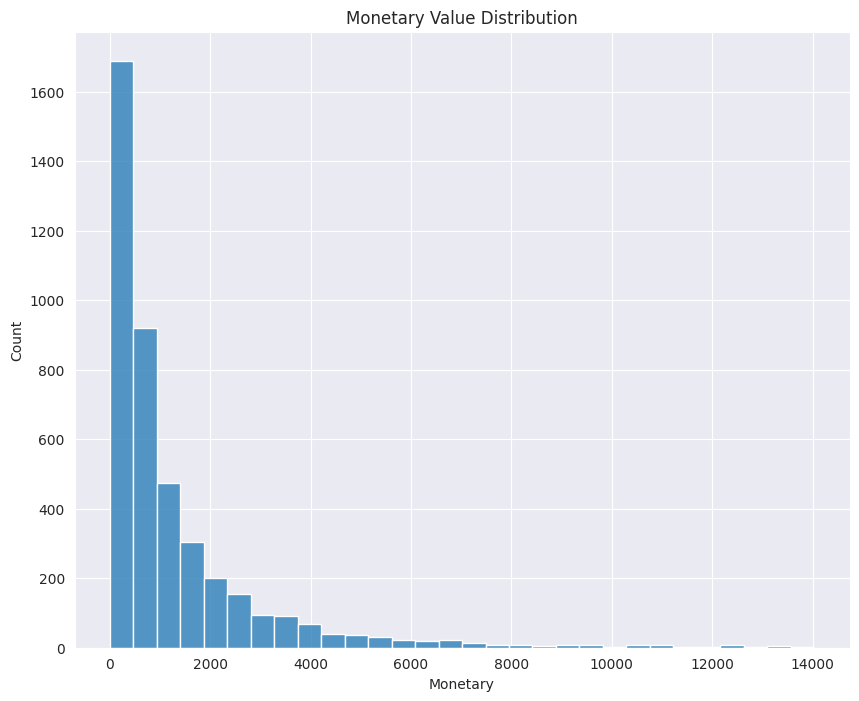

In [172]:
# Monetary Distribution
sns.histplot(data = rmf, x = 'Monetary', bins = 30)
plt.title('Monetary Value Distribution')
plt.show()

## CUSTOMER SEGMENTATION

In [173]:
#Mapping segments to their corresponding customer segments
segment_map = {
    r'[1-2][1-2]' : 'Hibernating',
    r'[1-2][3-4]' : 'At-Risk',
    r'[1-2]5' : "Can\'t Loose",
    r'3[1-2]' : 'About to Slip',
    r'33' : 'Need Attention',
    r'[3-4][4-5]' : 'Loyal Customers',
    r'41' : 'Promising',
    r'51' : 'New Customers',
    r'[4-5][2-3]' : 'Potential Loyalists',
    r'5[4-5]' : 'Champions',
}

In [174]:
#Mapping RFM segments to corresponding customer segments
rmf['rmf_segment'] = rmf['rmf_segment'].replace(segment_map, regex = True)

In [175]:
rmf

,CustomerID,Monetary,Frequency,Recency,Recency_score,Frequency_score,rmf_segment
1,12347.0,4310.00,182,2,5,5,Champions
2,12348.0,1797.24,31,75,2,3,At-Risk
3,12349.0,1757.55,73,19,4,4,Loyal Customers
4,12350.0,334.40,17,310,1,2,Hibernating
5,12352.0,2506.04,85,36,3,4,Loyal Customers
...,...,...,...,...,...,...,...
4334,18280.0,180.60,10,278,1,1,Hibernating
4335,18281.0,80.82,7,181,2,1,Hibernating
4336,18282.0,178.05,12,8,5,1,New Customers
4337,18283.0,2045.53,721,4,5,5,Champions


## Rescaling the Attributes-

It is extremely important to rescale the variables so that they have a comparable scale.| There are two common ways of rescaling:

Min-Max scaling

Standardisation (mean-0, sigma-1)

Here, we will use Standardisation Scaling.

In [176]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
rmf_scaled = scaler.fit_transform(rmf[['Monetary','Frequency','Recency' ]])

rmf_scaled

array([[ 1.66054097,  1.0827751 , -0.91770666],
       [ 0.26748499, -0.45632346, -0.18908184],
       [ 0.24548114, -0.02822982, -0.7480269 ],
       ...,
       [-0.63018225, -0.64998487, -0.85781969],
       [ 0.40513517,  6.57664347, -0.89774433],
       [ 0.28968287, -0.05880794, -0.50847902]])

Our Data pre-processing part ends here now we will perform the analysis of or data.

# Now, we will perform analysis of data using KMeans algorithm.

In [177]:
from sklearn.cluster import KMeans

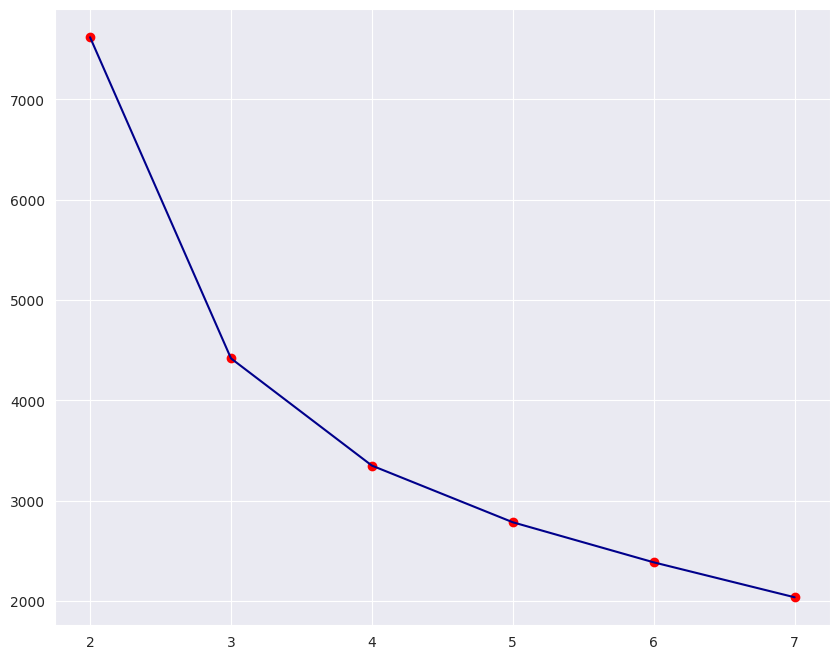

In [178]:
#Elbow curve method to get ideal no. of clusters
ssd = []
for k in range(2,8):


    km = KMeans(n_clusters=k,max_iter=150,random_state=42)

    km.fit(rmf_scaled)

    ssd.append(km.inertia_)

plt.plot(np.arange(2,8), ssd,color="darkblue")
plt.scatter(np.arange(2,8), ssd,color="red")
plt.show()

In [179]:
kmeans = KMeans(n_clusters = 4, max_iter=150, random_state = 42)
kmeans.fit(rmf_scaled) #fitting the model

KMeans(max_iter=150, n_clusters=4, random_state=42)

In [180]:
rmf['Cluster'] = kmeans.labels_ #giving labels as cluster values

In [181]:
rmf

,CustomerID,Monetary,Frequency,Recency,Recency_score,Frequency_score,rmf_segment,Cluster
1,12347.0,4310.00,182,2,5,5,Champions,2
2,12348.0,1797.24,31,75,2,3,At-Risk,3
3,12349.0,1757.55,73,19,4,4,Loyal Customers,3
4,12350.0,334.40,17,310,1,2,Hibernating,0
5,12352.0,2506.04,85,36,3,4,Loyal Customers,2
...,...,...,...,...,...,...,...,...
4334,18280.0,180.60,10,278,1,1,Hibernating,0
4335,18281.0,80.82,7,181,2,1,Hibernating,0
4336,18282.0,178.05,12,8,5,1,New Customers,3
4337,18283.0,2045.53,721,4,5,5,Champions,1


In [182]:
km_cluster_sale =rmf.groupby("Cluster").Monetary.mean()

km_cluster_Recency =rmf.groupby("Cluster").Recency.mean()

km_cluster_Frequency =rmf.groupby("Cluster").Frequency.mean()


km_cluster_sale

,Monetary
Cluster,
0,427.797228
1,6771.684773
2,2712.829414
3,692.721147


In [183]:
km_cluster_Recency

,Recency
Cluster,
0,252.133203
1,20.068182
2,31.945083
3,50.652193


In [184]:
km_cluster_Frequency

,Frequency
Cluster,
0,25.293830
1,366.000000
2,159.436782
3,40.932408


<Axes: ylabel='Recency'>

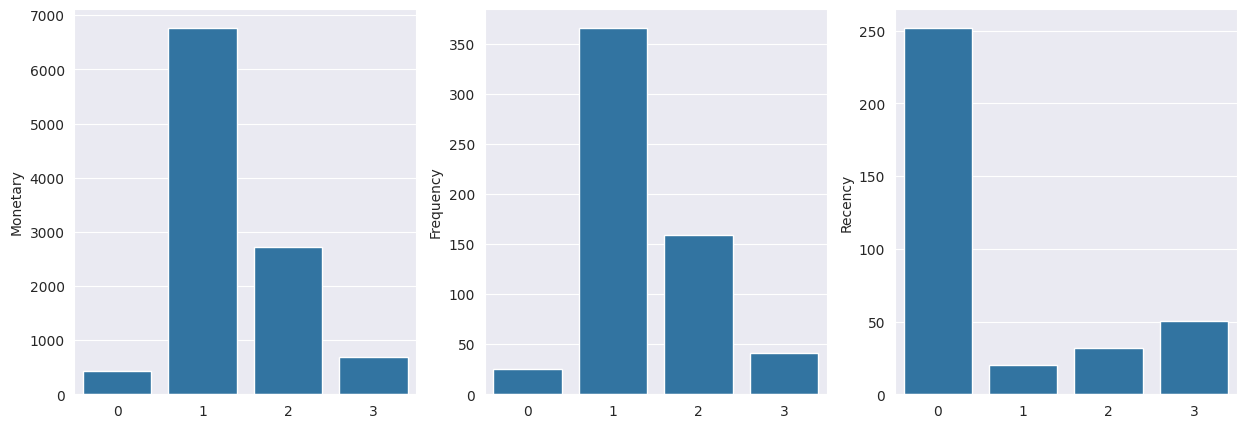

In [185]:
#first we are plotting bar chart

fig, axs = plt.subplots(1,3, figsize = (15, 5))
sns.barplot(x = [0,1,2,3],  y = km_cluster_sale , ax = axs[0])
sns.barplot(x = [0,1,2,3],  y = km_cluster_Frequency , ax = axs[1])
sns.barplot(x = [0,1,2,3],  y = km_cluster_Recency , ax = axs[2])

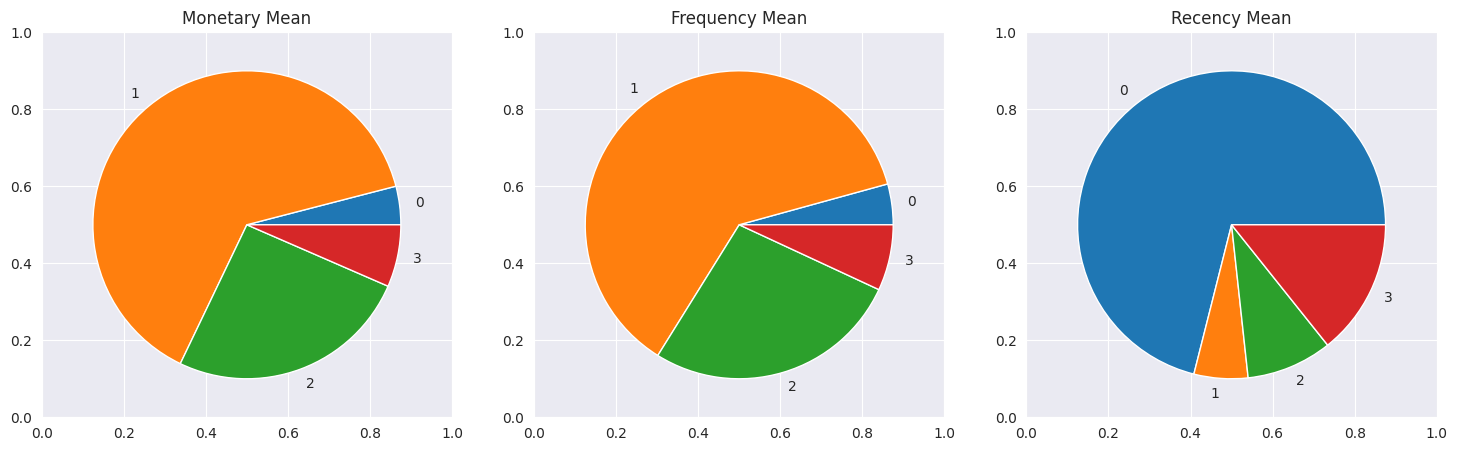

In [186]:
#now we are plotting pie-chart

fig,axis = plt.subplots(1,3, figsize =(18,5))
ax1 =fig.add_subplot(1,3,1)
plt.title("Monetary Mean")
ax1.pie(km_cluster_sale, labels =[0,1,2,3])
ax1 =fig.add_subplot(1,3,2)
plt.title("Frequency Mean")
ax1.pie(km_cluster_Frequency, labels =[0,1,2,3])
ax1 =fig.add_subplot(1,3,3)
plt.title("Recency Mean")
ax1.pie(km_cluster_Recency, labels =[0,1,2,3])
#ax1.axis("off")
plt.show()

## From the above pie chart we can easily understand our 4 groups according to Recency mean,Frequency mean and Monetary mean.

# -- Group 0 is the group of customers who spends very less amount of money and
# also not very much frequent buyers and also recency rate shows they have not
# purchased from company recently.

# -- Group 1 is the group of customer who spends maximum amount of money and also has maximum frequency and low recency rate that means frequent buyers.

# -- Group 2 is the group of customer who spends least amount of money and also has least frequency and high recency rate means they have not purchased anything from the past whereas,

# -- Group 3 are the customers whose frequency rate is good and monetary value is also good and recency rate is also fine .

## **#Now Customer Segmentation**

We will categorize the customers based on their RFM values into groups such as "Loyal Customers", "New Customers", "At-Risk Customers" and "Lost Customers".

Champions: Bought recently, buy often and spend the most.

Loyal Customers (High Frequency, Low Recency, High Monetary): These customers buy often and spend a lot. They are recent buyers, indicating ongoing engagement.

Potential Loyalist: Recent customers but spent a good amount and bought more than once.

Recent Customers: Bought most recently but not often.

Promising: Recent buyers but haven't spent much.

Customers Needing Attention: Above average recency, frequency and monetary values. May not have bought very recently though.

About to Slip: Below average recency, frequency and monetary values. Will lose them if not reactivated.

New Customers (Low Frequency, Low Recency, Low/Medium Monetary): These are customers who have started buying recently but have not yet bought frequently or spent a lot.

At-Risk Customers (Low Frequency, High Recency, Medium/High Monetary): These are customers who used to buy frequently and spend a significant amount, but it's been long time they purchased.

Lost Customers (Low Frequency, High Recency, Low Monetary): These customers have not purchased in a long time, they seldom bought and when they do, they spend little.

Can't Lose Them: Made biggest purchases and often. But haven't returned for a long time.

Hibernating: Last purchases was long back, with low spenders and low number of orders.

In [187]:
new_rfm = rmf[["Recency", "Frequency", "Monetary", "rmf_segment"]]

In [188]:
#Convert index to integer
new_rfm.index = new_rfm.index.astype(int)
new_rfm.head()

,Recency,Frequency,Monetary,rmf_segment
1,2,182,4310.00,Champions
2,75,31,1797.24,At-Risk
3,19,73,1757.55,Loyal Customers
4,310,17,334.40,Hibernating
5,36,85,2506.04,Loyal Customers


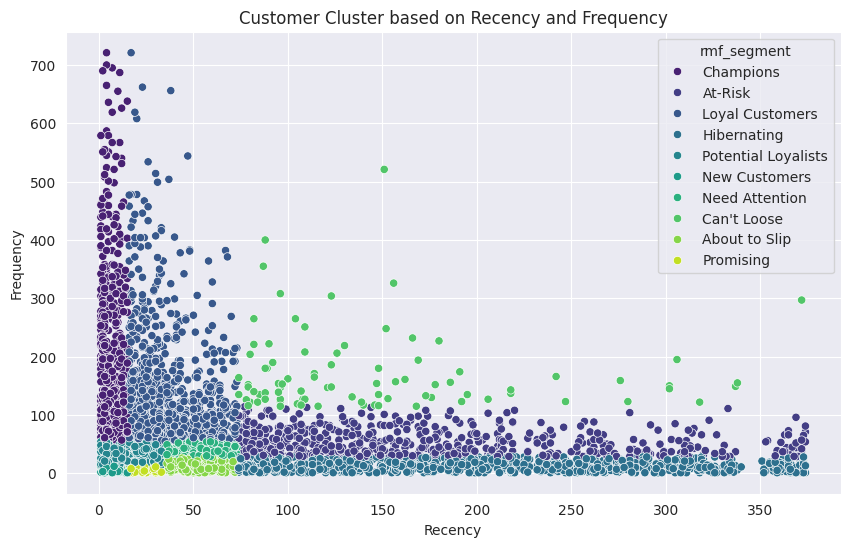

In [189]:
plt.figure(figsize = (10, 6))
sns.scatterplot(x = 'Recency', y = 'Frequency', hue = 'rmf_segment', data = new_rfm, palette = 'viridis')
plt.title('Customer Cluster based on Recency and Frequency')
plt.show()

In [190]:
import plotly.express as px
#Top 10 most preferred products
segments = new_rfm['rmf_segment'].value_counts()

fig = px.bar(
     x = segments.index,
     y = segments.values,
     color = segments.index,
     text = segments.values,
     title = "RMF Segments"
)
fig.update_layout(
    xaxis_title="Segment",
    yaxis_title="Count",
    font=dict(size=15, family="Arial"),
    title_font=dict(size=20, family="Arial")
)
fig.show()

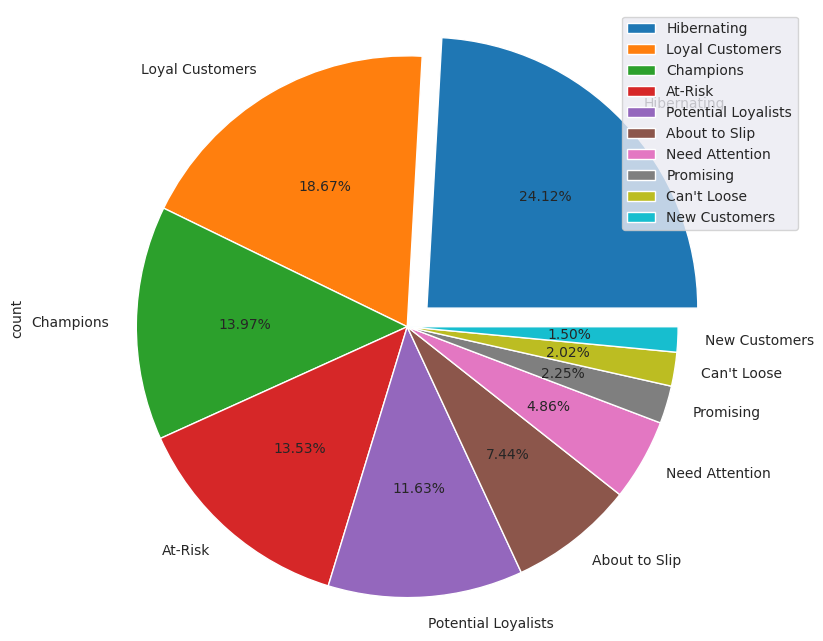

In [191]:
plt.figure(figsize = (10, 8), )
explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0)

segments.plot(
    kind = 'pie',
    color=segments.index,
    explode = explode,
    autopct = '%1.2f%%')
plt.axis('equal')
plt.legend(labels = segments.index, loc = "best")
plt.show()


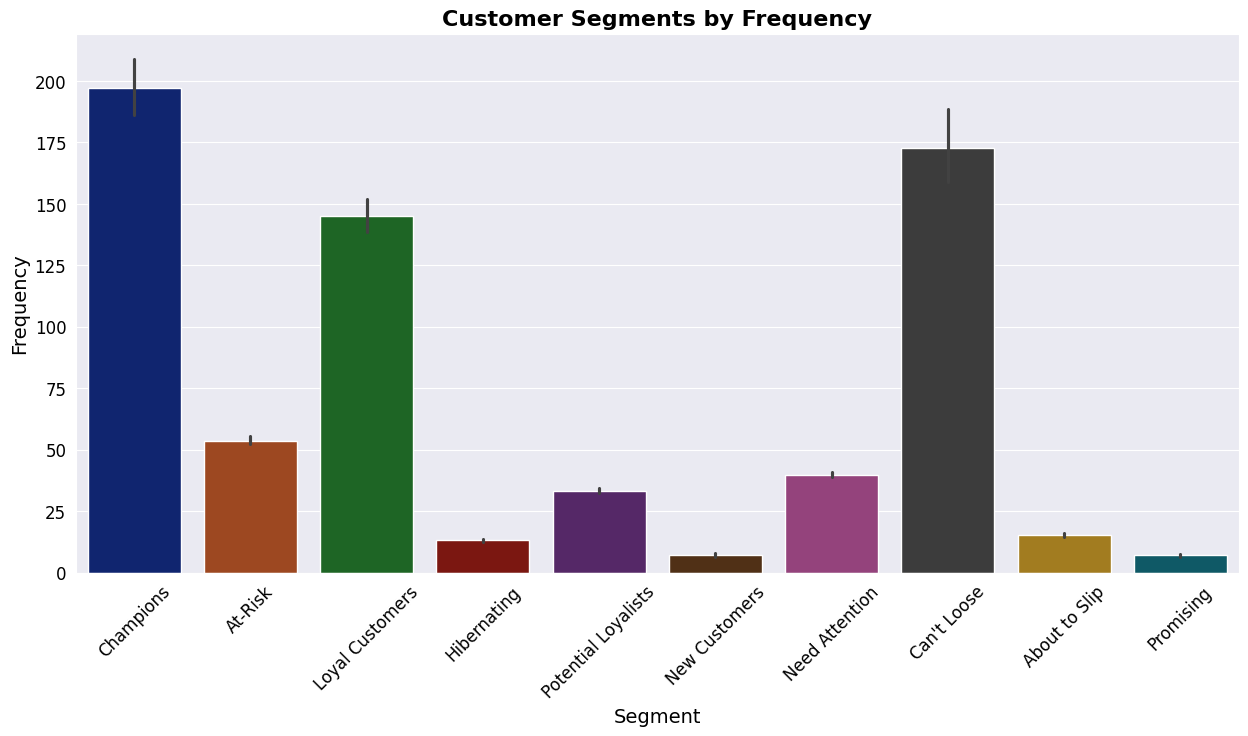

In [192]:
sns.set_style("darkgrid")
colors = sns.color_palette("dark")

# Create the plot
plt.figure(figsize=(15, 7))
sns.barplot(x = "rmf_segment", y = "Frequency", data = new_rfm, palette=colors)
plt.title("Customer Segments by Frequency", color='black', fontsize=16, fontweight='bold')
plt.xlabel("Segment", color='black', fontsize=14)
plt.ylabel("Frequency", color='black', fontsize=14)
plt.xticks(rotation=45, color='black', fontsize=12)
plt.yticks(color='black', fontsize=12)
plt.show()

In [193]:
new_rfm[["rmf_segment","Recency", "Frequency", "Monetary"]].groupby("rmf_segment").agg(["mean", "count","sum"])

Recency                 Frequency                \
                           mean count     sum        mean count     sum   
rmf_segment                                                               
About to Slip         54.066246   317   17139   15.356467   317    4868   
At-Risk              171.015625   576   98505   53.744792   576   30957   
Can't Loose          146.279070    86   12580  172.802326    86   14861   
Champions              6.724370   595    4001  197.228571   595  117351   
Hibernating          211.629990  1027  217344   13.137293  1027   13492   
Loyal Customers       35.647799   795   28340  144.919497   795  115211   
Need Attention        53.594203   207   11094   39.835749   207    8246   
New Customers          8.031250    64     514    7.203125    64     461   
Potential Loyalists   16.563636   495    8199   33.325253   495   16496   
Promising             23.927083    96    2297    7.125000    96     684   

                        Monetary                     
                            mean count          sum  
rmf_segment                                          
About to Slip         471.204511   317   149371.830  
At-Risk               950.955278   576   547750.240  
Can't Loose          2302.738500    86   198035.511  
Champions            3150.606319   595  1874610.760  
Hibernating           375.134588  1027   385263.222  
Loyal Customers      2256.645962   795  1794033.540  
Need Attention        843.070870   207   174515.670  
New Customers         655.209375    64    41933.400  
Potential Loyalists   791.123598   495   391606.181  
Promising             428.288958    96    41115.740

## ANALYSIS REPORT--

We were able to segment customers based on their recency, frequency and monetary value.

We were able to detect our most valuable customers.

We were able to detect our loyal customers.

We were able to detect our new customers.

We were able to detect our lost customers, so we will probably find out why they left us and how to regain their loyalties.

We were able to develop a model for predicting future customer spending based on RFM analysis.

## CONCLUSION--

RFM Analysis is a crucial tool for understanding customer behaviour and segmenting them based on purchasing habits.

RFM helps in personalizing marketing strategies and improving customer engagement and retention.